# Pengujian Pengaruh Regularization Pada FFNN

Pengujian ini bertujuan untuk menganalisis pengaruh L1 dan L2 regularization pada performa model FFNN

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

%load_ext autoreload
%autoreload 2

from model import FFNN
from activation import ReLU, Softmax
from loss import CategoricalCrossEntropy
from regularizers import NoRegularizer, L1Regularizer, L2Regularizer
from layer import Layer
from utils import train_and_evaluate, load_mnist_data

# Create out dir
os.makedirs("../../out", exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def create_model_with_regularizer(input_size, hidden_size, output_size, regularizer):
    """
    Create a model with the specified regularizer for all layers
    """
    model = FFNN(
        layer_sizes=[input_size, hidden_size, output_size],
        activations=[ReLU(), Softmax()],
        loss=CategoricalCrossEntropy()
    )
    
    # Replace the default regularizers with the specified one
    model.layers = []
    for i in range(len(model.layer_sizes) - 1):
        model.layers.append(Layer(
            input_size=model.layer_sizes[i],
            output_size=model.layer_sizes[i + 1],
            activation=model.activations[i],
            regularizer=regularizer
        ))
    
    return model

Loading MNIST dataset...
Data loaded: X_train: (8000, 784), y_train: (8000,)
Test data: X_test: (2000, 784), y_test: (2000,)

Training model with None regularization

Training FFNN with None regularization...


Epoch 1/10: 100%|██████████| 250/250 [00:02<00:00, 89.03batch/s, loss=0.1672] 


Epoch 1/10 - loss: 0.4311, val_loss: 0.2599


Epoch 2/10: 100%|██████████| 250/250 [00:02<00:00, 117.42batch/s, loss=0.7331]


Epoch 2/10 - loss: 0.2055, val_loss: 0.2727


Epoch 3/10: 100%|██████████| 250/250 [00:02<00:00, 100.73batch/s, loss=0.0551]


Epoch 3/10 - loss: 0.1379, val_loss: 0.2284


Epoch 4/10: 100%|██████████| 250/250 [00:02<00:00, 103.45batch/s, loss=0.4980]


Epoch 4/10 - loss: 0.1154, val_loss: 0.2328


Epoch 5/10: 100%|██████████| 250/250 [00:01<00:00, 132.47batch/s, loss=0.0187]


Epoch 5/10 - loss: 0.0892, val_loss: 0.2242


Epoch 6/10: 100%|██████████| 250/250 [00:02<00:00, 92.78batch/s, loss=0.3452] 


Epoch 6/10 - loss: 0.0791, val_loss: 0.2658


Epoch 7/10: 100%|██████████| 250/250 [00:02<00:00, 86.78batch/s, loss=0.1765] 


Epoch 7/10 - loss: 0.0766, val_loss: 0.3759


Epoch 8/10: 100%|██████████| 250/250 [00:02<00:00, 97.70batch/s, loss=0.3538] 


Epoch 8/10 - loss: 0.0697, val_loss: 0.3357


Epoch 9/10: 100%|██████████| 250/250 [00:03<00:00, 82.73batch/s, loss=0.0025] 


Epoch 9/10 - loss: 0.0638, val_loss: 0.3882


Epoch 10/10: 100%|██████████| 250/250 [00:02<00:00, 94.81batch/s, loss=0.0674] 


Epoch 10/10 - loss: 0.0475, val_loss: 0.4770
Training took 25.71 seconds
FFNN with None regularization accuracy: 0.9325

Training model with L1 regularization

Training FFNN with L1 regularization...


Epoch 1/10: 100%|██████████| 250/250 [00:02<00:00, 90.82batch/s, loss=0.3231] 


Epoch 1/10 - loss: 0.6876, val_loss: 0.5977


Epoch 2/10: 100%|██████████| 250/250 [00:03<00:00, 62.64batch/s, loss=0.3945] 


Epoch 2/10 - loss: 0.5445, val_loss: 0.4840


Epoch 3/10: 100%|██████████| 250/250 [00:03<00:00, 83.06batch/s, loss=0.3222] 


Epoch 3/10 - loss: 0.5054, val_loss: 0.4674


Epoch 4/10: 100%|██████████| 250/250 [00:03<00:00, 69.38batch/s, loss=0.5148] 


Epoch 4/10 - loss: 0.5001, val_loss: 0.5234


Epoch 5/10: 100%|██████████| 250/250 [00:03<00:00, 67.16batch/s, loss=0.4684]


Epoch 5/10 - loss: 0.4913, val_loss: 0.4941


Epoch 6/10: 100%|██████████| 250/250 [00:02<00:00, 103.10batch/s, loss=0.3922]


Epoch 6/10 - loss: 0.4872, val_loss: 0.4730


Epoch 7/10: 100%|██████████| 250/250 [00:02<00:00, 123.68batch/s, loss=0.6454]


Epoch 7/10 - loss: 0.4776, val_loss: 0.4981


Epoch 8/10: 100%|██████████| 250/250 [00:02<00:00, 87.01batch/s, loss=0.3309] 


Epoch 8/10 - loss: 0.4811, val_loss: 0.4569


Epoch 9/10: 100%|██████████| 250/250 [00:03<00:00, 69.06batch/s, loss=0.4595] 


Epoch 9/10 - loss: 0.4815, val_loss: 0.4300


Epoch 10/10: 100%|██████████| 250/250 [00:02<00:00, 111.19batch/s, loss=0.7332]


Epoch 10/10 - loss: 0.4782, val_loss: 0.4782
Training took 30.45 seconds
FFNN with L1 regularization accuracy: 0.8610

Training model with L2 regularization

Training FFNN with L2 regularization...


Epoch 1/10: 100%|██████████| 250/250 [00:02<00:00, 99.63batch/s, loss=0.1349] 


Epoch 1/10 - loss: 0.5181, val_loss: 0.3783


Epoch 2/10: 100%|██████████| 250/250 [00:02<00:00, 96.62batch/s, loss=0.2199] 


Epoch 2/10 - loss: 0.3796, val_loss: 0.3744


Epoch 3/10: 100%|██████████| 250/250 [00:01<00:00, 126.19batch/s, loss=0.2163]


Epoch 3/10 - loss: 0.3506, val_loss: 0.3071


Epoch 4/10: 100%|██████████| 250/250 [00:03<00:00, 76.12batch/s, loss=0.4503] 


Epoch 4/10 - loss: 0.3415, val_loss: 0.3446


Epoch 5/10: 100%|██████████| 250/250 [00:02<00:00, 90.35batch/s, loss=0.3077] 


Epoch 5/10 - loss: 0.3387, val_loss: 0.3294


Epoch 6/10: 100%|██████████| 250/250 [00:02<00:00, 107.04batch/s, loss=0.5574]


Epoch 6/10 - loss: 0.3292, val_loss: 0.3806


Epoch 7/10: 100%|██████████| 250/250 [00:03<00:00, 80.52batch/s, loss=0.2083]


Epoch 7/10 - loss: 0.3282, val_loss: 0.2823


Epoch 8/10: 100%|██████████| 250/250 [00:02<00:00, 99.58batch/s, loss=0.2811] 


Epoch 8/10 - loss: 0.3241, val_loss: 0.3374


Epoch 9/10: 100%|██████████| 250/250 [00:02<00:00, 93.59batch/s, loss=0.3844] 


Epoch 9/10 - loss: 0.3330, val_loss: 0.3133


Epoch 10/10: 100%|██████████| 250/250 [00:04<00:00, 61.39batch/s, loss=0.4583]


Epoch 10/10 - loss: 0.3272, val_loss: 0.3420
Training took 28.03 seconds
FFNN with L2 regularization accuracy: 0.9000


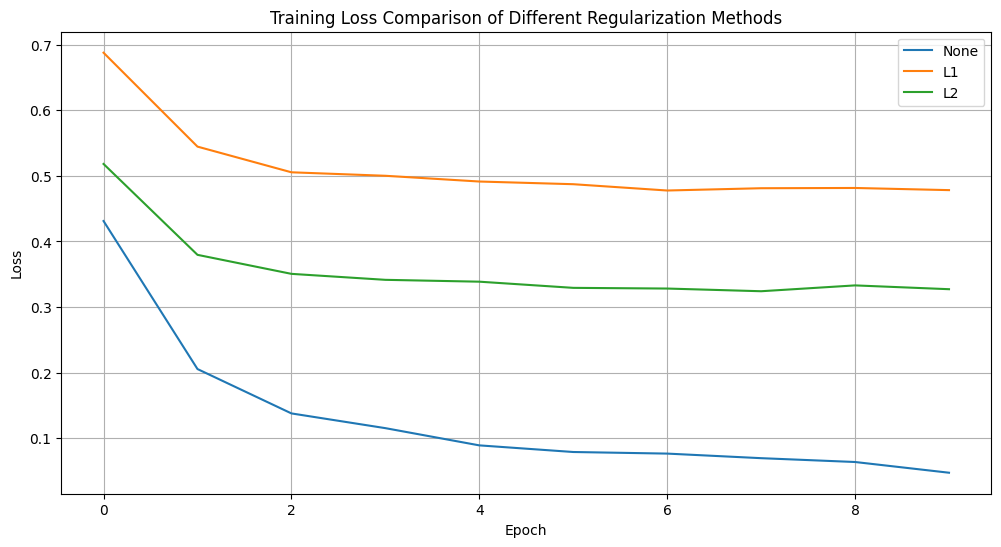

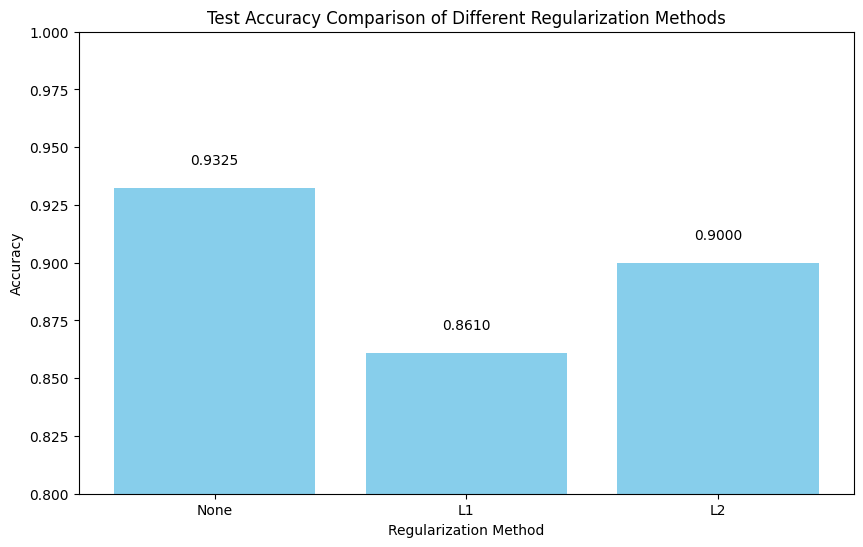

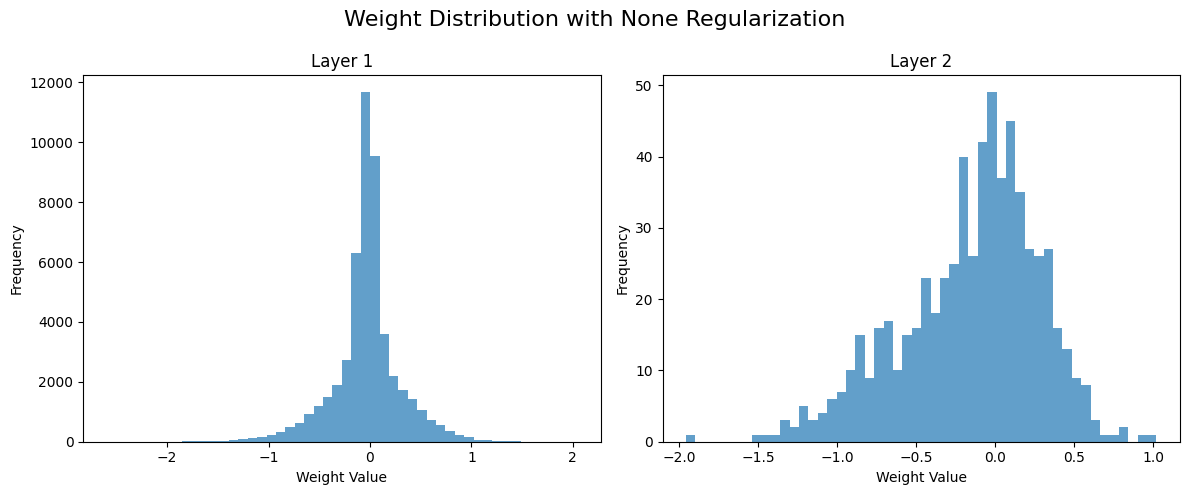

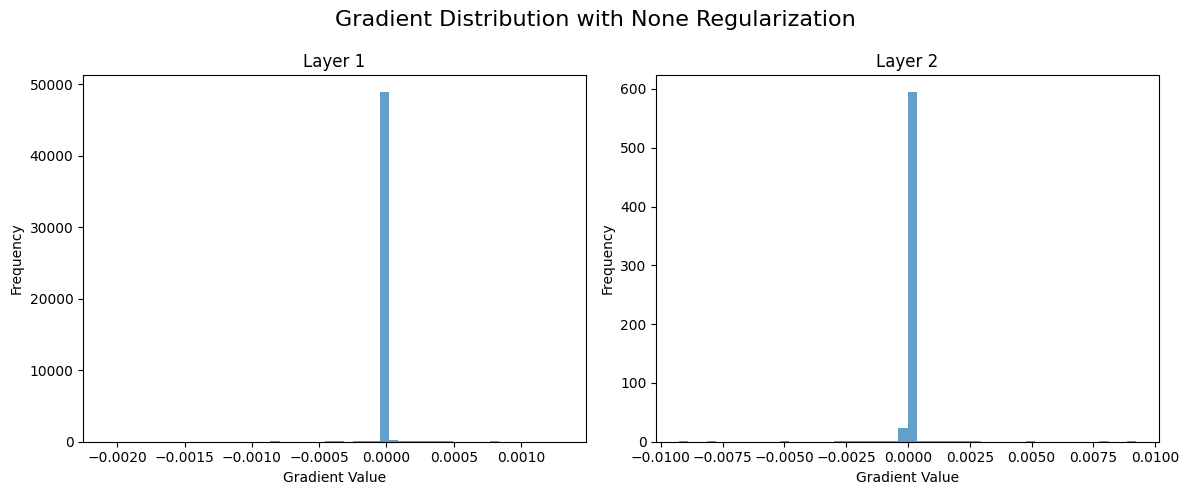

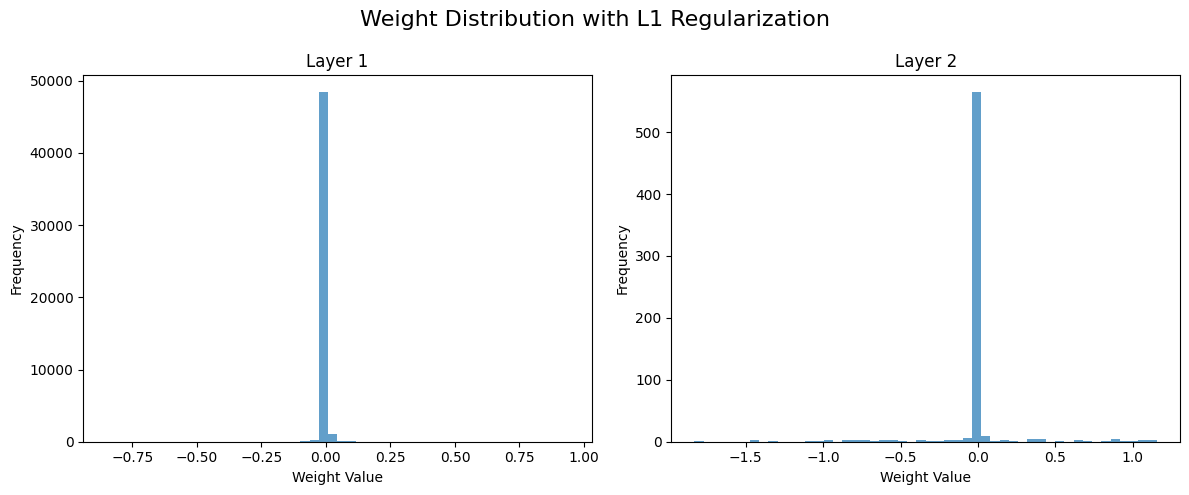

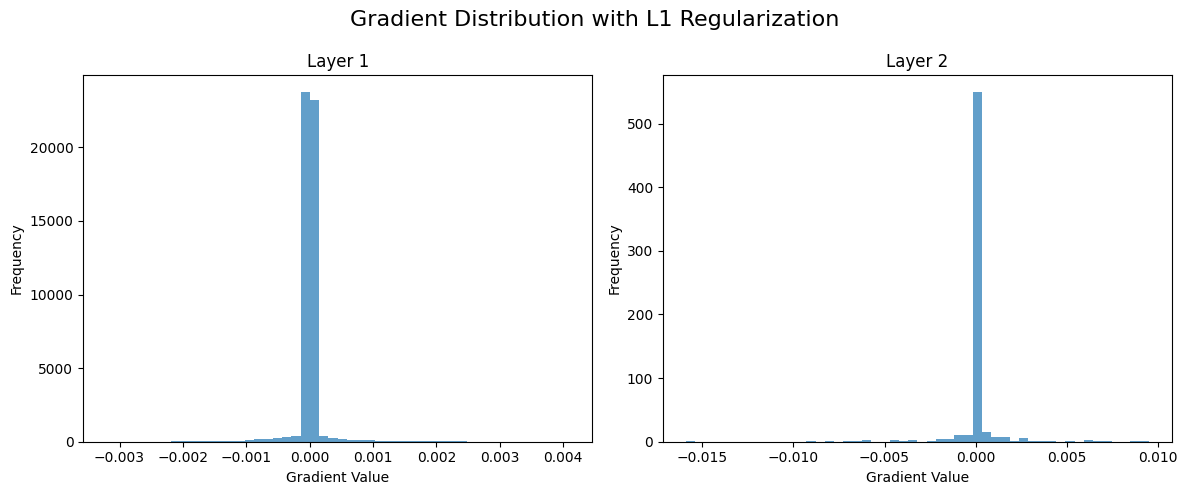

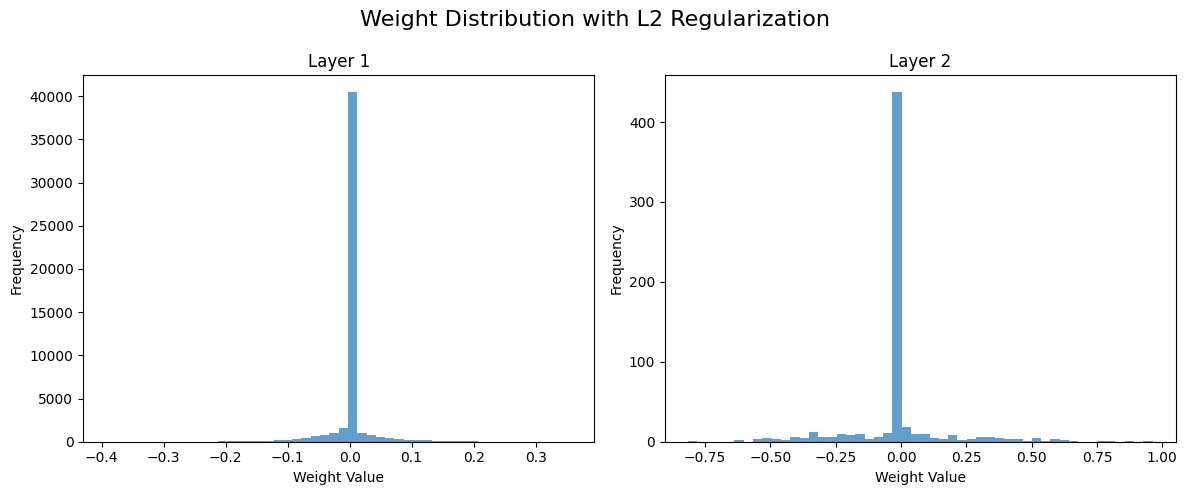

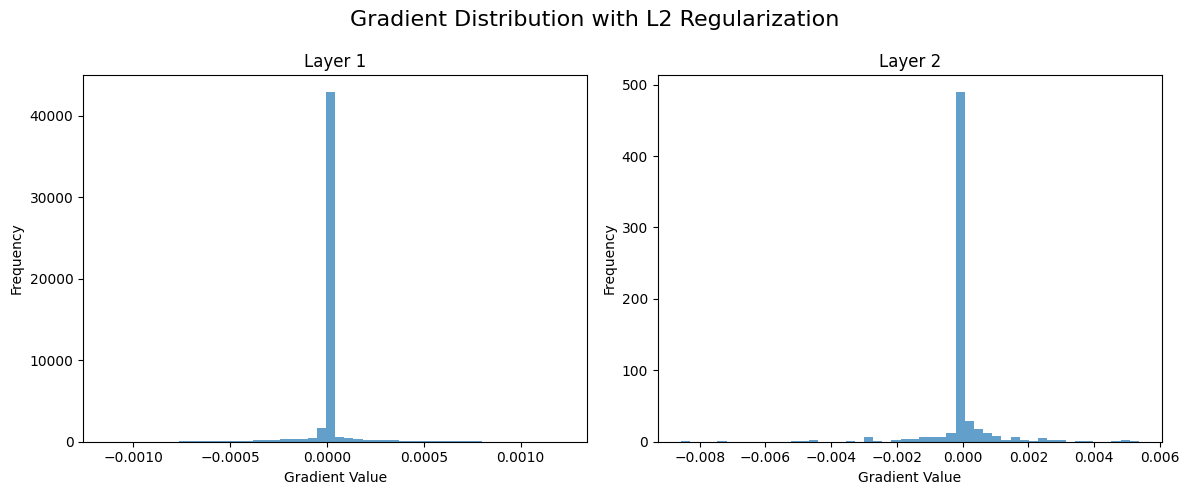

In [ ]:
# Load MNIST dataset
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data(subset_size=10000)

input_size = X_train.shape[1]  # 784 for MNIST
output_size = y_train_onehot.shape[1]  # 10 for MNIST
hidden_size = 64  # Fixed hidden layer size for all experiments

# Experiment configurations
epochs = 10
batch_size = 32
learning_rate = 0.01

# Test different regularization methods
regularizers = [
    ("None", NoRegularizer()),
    ("L1", L1Regularizer(lambda_param=0.0001)),
    ("L2", L2Regularizer(lambda_param=0.0001))
]

reg_histories = []
reg_accuracies = []
trained_models = []

for name, regularizer in regularizers:
    model_name = f"FFNN with {name} regularization"
    print(f"\nTraining model with {name} regularization")
    
    model = create_model_with_regularizer(input_size, hidden_size, output_size, regularizer)
    
    history, accuracy, _, trained_model = train_and_evaluate(
        model, X_train, X_test, y_train_onehot, y_test, y_test_onehot,
        epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
        model_name=model_name
    )
    
    reg_histories.append(history)
    reg_accuracies.append(accuracy)
    trained_models.append(trained_model)

# Plot loss curves for all regularization methods
plt.figure(figsize=(12, 6))
for i, (name, _) in enumerate(regularizers):
    plt.plot(reg_histories[i]['loss'], label=f'{name}')

plt.title('Training Loss Comparison of Different Regularization Methods')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('../../out/regularization_comparison_loss.png')

# Bar chart of accuracies
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in regularizers], reg_accuracies, color='skyblue')
plt.title('Test Accuracy Comparison of Different Regularization Methods')
plt.xlabel('Regularization Method')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
for i, v in enumerate(reg_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.savefig('../../out/regularization_comparison_accuracy.png')

# Plot weight and gradient distributions for each model
for i, (name, _) in enumerate(regularizers):
    model = trained_models[i]
    
    # Plot weight distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Weight Distribution with {name} Regularization', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        weights = layer.weights.flatten()
        plt.hist(weights, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/regularization_{name}_weight_dist.png')
    
    # Plot gradient distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Gradient Distribution with {name} Regularization', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        gradients = layer.weights_grad.flatten()
        plt.hist(gradients, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Gradient Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/regularization_{name}_gradient_dist.png')

In [ ]:
print("\nACCURACY RESULTS:")
for i, (name, _) in enumerate(regularizers):
    print(f"{name} Regularization: {reg_accuracies[i]:.4f}")

# Best and worst performing regularization methods
best_idx = np.argmax(reg_accuracies)
worst_idx = np.argmin(reg_accuracies)

print(f"\nBest performing: {regularizers[best_idx][0]} with accuracy {reg_accuracies[best_idx]:.4f}")
print(f"Worst performing: {regularizers[worst_idx][0]} with accuracy {reg_accuracies[worst_idx]:.4f}")


ACCURACY RESULTS:
None Regularization: 0.9325
L1 Regularization: 0.8610
L2 Regularization: 0.9000

Best performing: None with accuracy 0.9325
Worst performing: L1 with accuracy 0.8610
